### About Dataset

Chess has been a timeless and beloved board game for centuries, but the online chess community has breathed new life into this classic game. With the rise of online chess platforms, we now have access to an incredible amount of data on chess games, providing endless opportunities for analysis and insight.

This exciting dataset contains information on a vast array of online chess games, including details on the number of turns, the opening used, and the outcome of the game. By delving into this data, enthusiasts and researchers alike can gain a deeper understanding of the strategies and nuances that make chess such a fascinating game. What's more, by exploring the relationships between different openings and the likelihood of winning, we can uncover insights that can help us improve our game and gain a competitive edge.

Whether you're a chess enthusiast, a data scientist, or just someone curious about this incredible game, this dataset is a treasure trove of information that you won't want to miss. So dive in and explore the fascinating world of online chess!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../DataSets/Online Chess/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

DataSets/Online Chess/chess_games.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('DataSets/Online Chess/chess_games.csv')
df.shape

(20058, 17)

<AxesSubplot:>

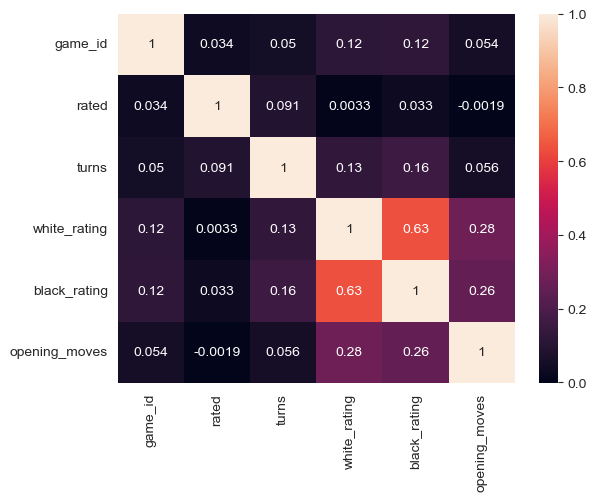

In [4]:
sns.heatmap(df.corr(),annot=True)

In [5]:
for col in df.columns:
    print(f"Unique counts for column {col}:")
    print(df[col].nunique())

Unique counts for column game_id:
20058
Unique counts for column rated:
2
Unique counts for column turns:
211
Unique counts for column victory_status:
4
Unique counts for column winner:
3
Unique counts for column time_increment:
400
Unique counts for column white_id:
9438
Unique counts for column white_rating:
1516
Unique counts for column black_id:
9331
Unique counts for column black_rating:
1521
Unique counts for column moves:
18920
Unique counts for column opening_code:
365
Unique counts for column opening_moves:
23
Unique counts for column opening_fullname:
1477
Unique counts for column opening_shortname:
128
Unique counts for column opening_response:
3
Unique counts for column opening_variation:
615


In [6]:
df['opening_variation'].fillna(df['opening_variation'].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

game_id                  0
rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_id                 0
white_rating             0
black_id                 0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_fullname         0
opening_shortname        0
opening_response     18851
opening_variation        0
dtype: int64

In [8]:
df['victory_status'].unique()

array(['Out of Time', 'Resign', 'Mate', 'Draw'], dtype=object)

In [9]:
df['winner'].unique()

array(['White', 'Black', 'Draw'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  20058 non-null  objec

In [11]:
cat_df = df.select_dtypes(exclude= ['int','float'])
num_df = df.select_dtypes(exclude = ['object','bool'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = le.fit_transform(cat_df[col])

In [13]:
final_df = pd.concat([cat_df,num_df],axis=1)

In [14]:
final_df = mms.fit_transform(final_df)

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init = 'k-means++',random_state=42)
    kmeans.fit(final_df)
    wcss.append(kmeans.inertia_)

AttributeError: 'NoneType' object has no attribute 'split'

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

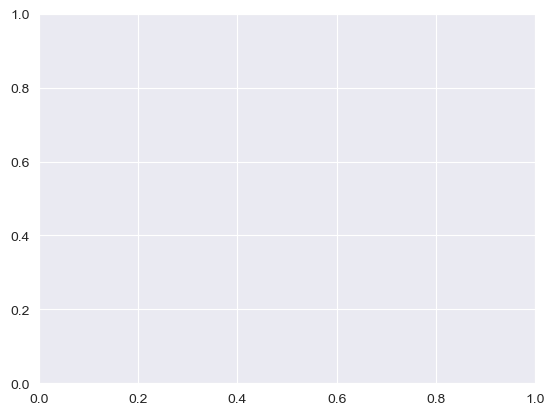

In [16]:
# Plot the results as an elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(final_df)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_
print(labels)
print(centroid)

[0 1 2 ... 3 3 1]
[[-2.22044605e-16  7.13553677e-01  5.28952088e-01  3.64306873e-01
   5.08107964e-01  5.07843665e-01  4.91132436e-01  3.76374330e-01
   5.26141034e-01  5.82836542e-01  9.63446921e-01  3.09400353e-01
   4.79896515e-01  1.53079270e-01  4.23113717e-01  4.03566344e-01
   1.41771287e-01]
 [ 1.00000000e+00  7.50394091e-01  1.14849345e-03  2.94299456e-01
   4.95076868e-01  5.01152737e-01  5.00533008e-01  3.82158410e-01
   5.29801327e-01  5.84063443e-01  9.59825249e-01  3.15048103e-01
   5.00040228e-01  1.75568850e-01  4.03136573e-01  4.39301852e-01
   1.39090313e-01]
 [ 1.00000000e+00  6.68877426e-01  9.60206338e-01  3.28101019e-01
   4.93971723e-01  4.86059554e-01  6.27076135e-01  3.68397753e-01
   2.67352894e-01  3.34486100e-01  9.66511095e-01  2.94774671e-01
   5.09160560e-01  1.72646022e-01  4.25810471e-01  3.78120573e-01
   1.35311189e-01]
 [ 1.00000000e+00  7.07594847e-01  9.59641256e-01  2.86604832e-01
   4.98801622e-01  5.03361318e-01  3.96794613e-01  4.12346622e-01
 